In [1]:
import numpy as np
import os
from PIL import Image
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}


Import de tous les modules disponibles et utiles pour la suite.

In [3]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

Fonction permettant d'effectuer et d'afficher le clustering de données (arg 1) avec un algorithme connu de python passé en argument (dans ce notebook: aglomerative clustering)

In [4]:
Dict=pickle.load(open("fichierDicoS4.pkl",'rb'))

In [16]:
name="rafael benítez"

num_pictures=len(Dict[name].keys())

X=np.zeros((num_pictures,128))

for i in range(num_pictures):
    
    if Dict[name][i]!=[]:
        print(i)
        X[i]=Dict[name][i][0]
    else:
        print("vide")
        X[i]=np.zeros((128))




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
vide
43
44
45
46
47
48
49
50
51
52


In [7]:
print("The size of X: ",X.shape)
print("The number of pictures in the folder: ",num_pictures)
print("The output dimension of Face_recognition: ",Dict[name][0][0].shape[0])

The size of X:  (53, 128)
The number of pictures in the folder:  53
The output dimension of Face_recognition:  128


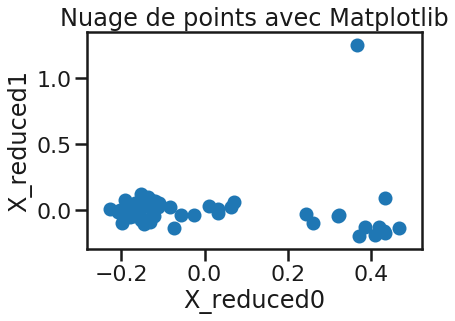

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca=PCA(n_components=2)
X_reduced=pca.fit_transform(X)
plt.scatter(X_reduced[:,0],X_reduced[:,1])
plt.title('Nuage de points avec Matplotlib')
plt.xlabel('X_reduced0')
plt.ylabel('X_reduced1')
plt.show()  

In [9]:
print(len(X))

53


Pour cette fore de clustering, il faut savoir à l'avance combien de clusters on souhaite, ou alors faire beaucoup de tentatives avant de trouver la meilleure. Comme ici on veut procéder à de la classification binaire, on va utiliser n_cluster= 2, même si techniquement les outliers ne forment pas un cluster à part entière : on a donc avant même de commencer les tests un problème qui se pose vis à vis des outliers pour cette méthode.

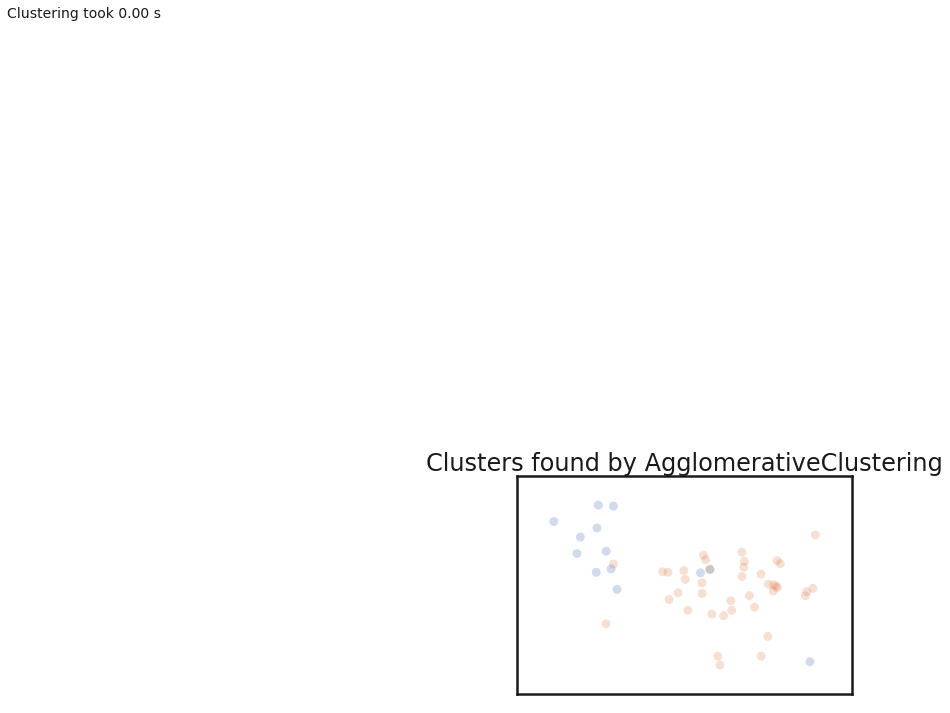

In [11]:
plot_clusters(X, cluster.AgglomerativeClustering, (), {'n_clusters':2, 'linkage':'ward'})

Appel de la fonction écrite au début pour avoir une approche visuelle du clustering :  montre déjà des difficultés à créer des clusters bien délimités mais insuffisant.

In [12]:
clustering = cluster.AgglomerativeClustering(n_clusters=2).fit_predict(X)
print(clustering) 

[1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1
 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1]


In [14]:
clustering = cluster.AgglomerativeClustering(n_clusters=2).fit(X)
print(clustering) 

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=2,
            pooling_func=<function mean at 0x000002BEA3CBF9D8>)


De toutes les possibilités, fit_predict semble la plus adaptée pour un algorithme de décision binaire. La dernière chose à faire est d'effectuer des tests avec l'algorithme développé pour ça, ce qui nous permettra d'obtenir un chiffre précis.